<a href="https://colab.research.google.com/github/marivic9/EDA-CS-103/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#packages
from pandas import read_csv
from matplotlib import pyplot
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv("/gdrive/MyDrive/Colab Notebooks/pima-indians-diabetes.csv")

# **Shape**

In [90]:
#Shape
shape = data.shape
print(shape)

(768, 9)


# **Data type**

In [91]:
#Data type
types = data.dtypes
print(types)

Pregnancies                   float64
Glucose                       float64
Blood_Pressure                float64
Skin_Thickness                float64
Insulin                       float64
BMI                           float64
Diabetes_Pedigree_Function    float64
Age                             int64
Outcome                         int64
dtype: object


# **Descriptive Analysis**

In [92]:
#Descriptive Analysis
data.describe()
data.describe(include='all')

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
count,657.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.656250,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.217291,30.438286,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,7.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data = data.rename(columns = {'preg': 'Pregnancies',
                          'plas' : 'Glucose',
                          'pres':'Blood_Pressure',
                          'skin': 'Skin_Thickness',
                          'test': 'Insulin',
                          'mass': 'BMI',
                          'pedi':'Diabetes_Pedigree_Function',
                          'age': 'Age',
                          'class': 'Outcome' })
data.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# **Class Distribution**

In [99]:
#Class Distribution

Outcome_counts = data.groupby('Outcome').size()
print(Outcome_counts)

Outcome
0    500
1    268
dtype: int64


# Attributes Graph - Class Distribution

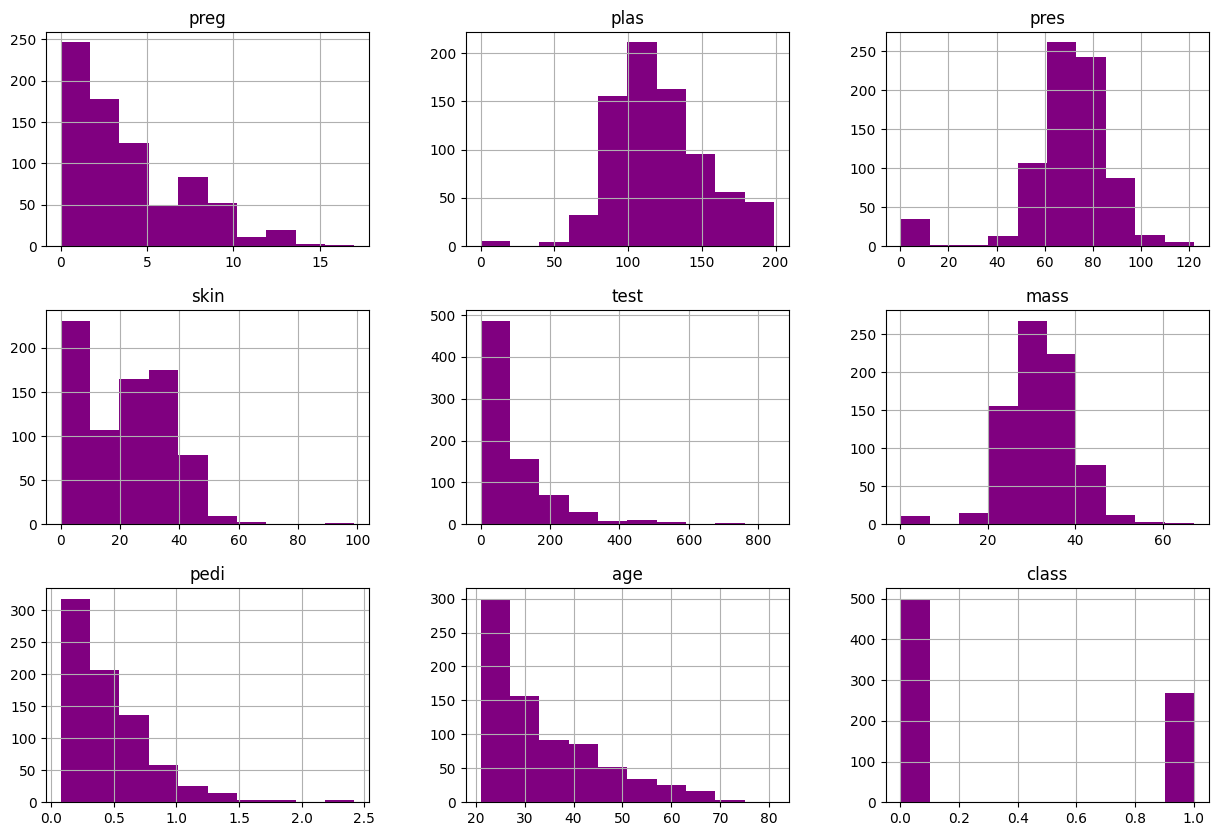

In [ ]:
#Graph
pyplot.rcParams['figure.figsize'] = (15, 10)
data.hist(color = 'purple')
pyplot.show()

# **Correlation**

                            Pregnancies   Glucose  Blood_Pressure  \
Pregnancies                    1.000000  0.166419        0.279271   
Glucose                        0.166419  1.000000        0.218749   
Blood_Pressure                 0.279271  0.218749        1.000000   
Skin_Thickness                 0.143110  0.192615        0.191853   
Insulin                        0.035653  0.419451        0.045087   
BMI                            0.127738  0.231049        0.281199   
Diabetes_Pedigree_Function    -0.006459  0.137327       -0.002763   
Age                            0.550525  0.266909        0.324595   
Outcome                        0.268218  0.492782        0.166074   

                            Skin_Thickness   Insulin       BMI  \
Pregnancies                       0.143110  0.035653  0.127738   
Glucose                           0.192615  0.419451  0.231049   
Blood_Pressure                    0.191853  0.045087  0.281199   
Skin_Thickness                    1.000000  0

<Axes: >

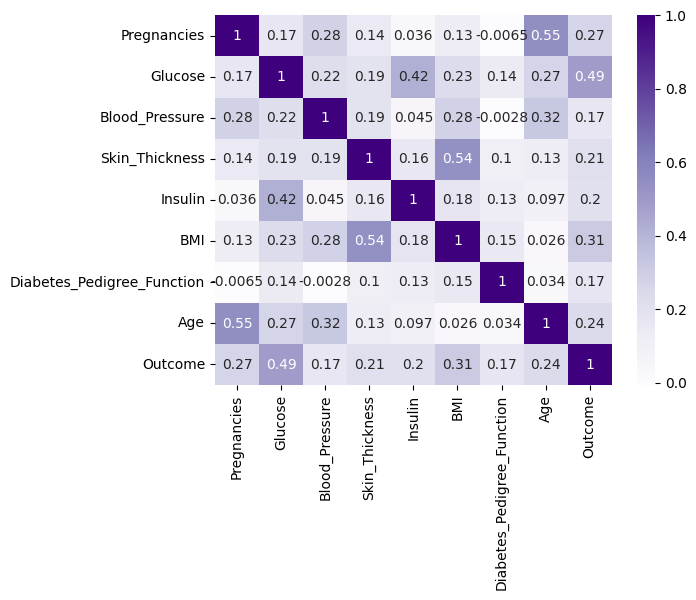

In [100]:
#Correlation
correlations = data.corr(method='pearson')
type(correlations)
print(correlations)

sns.heatmap(correlations, annot=True, cmap='Purples')

This heatmap shows how different features in a dataset are related to each other using correlation values. Correlation measures how one feature changes with another. The values range from -1 to 1, where 1 means a strong positive relationship, -1 means a strong negative relationship, and 0 means no relationship. Dark blue squares represent high positive correlations, light colors show low or no correlation, and negative values are shown by lighter colors towards blue.

From the heatmap, we see that preg (number of pregnancies) and age have a moderate positive correlation of 0.54, indicating that more pregnancies are generally associated with older age. plas (plasma glucose) and test also have a positive correlation of 0.33, meaning higher glucose levels tend to be related to higher test results. Many other features, like pres (blood pressure) and pedi (pedigree), have low correlations (e.g., 0.041), suggesting they do not influence each other much. This heatmap helps identify which features might be similar and which provide unique information, which is useful for analyzing data and building models.

**Skew**

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64


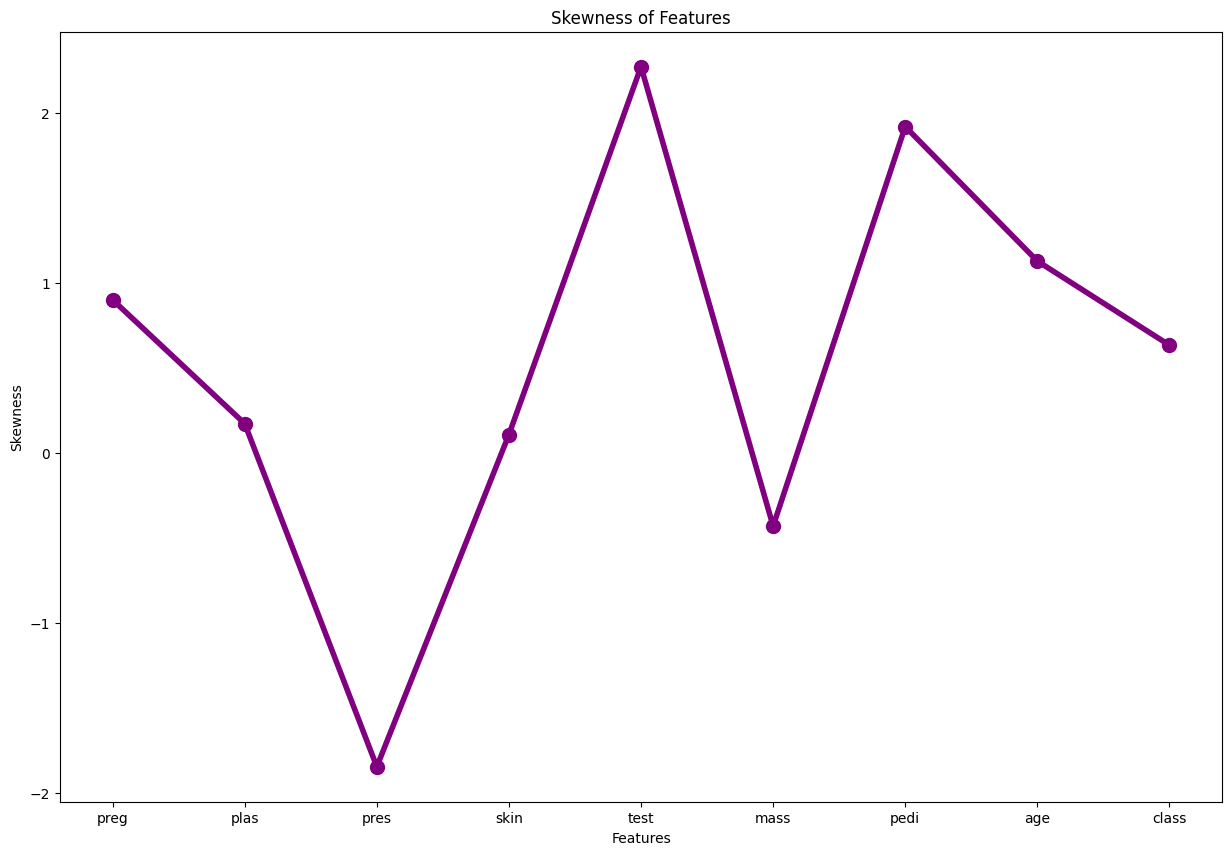

In [ ]:
#Skew
skew = data.skew()
print(skew)

data.skew().plot(kind='line', color='purple', linewidth=4, marker = 'o', markersize = 10)
pyplot.title("Skewness of Features")
pyplot.xlabel("Features")
pyplot.ylabel("Skewness")
pyplot.show()

This graph shows the skewness of different features in a dataset, which indicates how the data is distributed. The x-axis lists the features (preg, plas, pres, skin, test, mass, pedi, age, class), and the y-axis shows the skewness values. A positive skewness means the data has more lower values with a long tail to the right, while negative skewness means the opposite, with more higher values and a tail to the left.

From the graph, we see that test has high positive skewness, indicating most values are low, but some are very high. On the other hand, pres has high negative skewness, meaning it has more high values. Features like plas and class are close to zero skewness, showing they are more symmetrical.

These skewness patterns help understand how the data is spread, which is important for making decisions on how to process the data. For highly skewed features, transformations might be needed to improve the accuracy of analyses and models.

In [101]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,657.0,4.494673,3.217291,1.000,2.00000,4.000000,7.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.000000,140.25000,199.00
Blood_Pressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
Skin_Thickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
Diabetes_Pedigree_Function,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [102]:
data['Age'].value_counts()

,count
Age,
22,72
21,63
25,48
24,46
23,38
28,35
26,33
27,32
29,29


In [103]:
data_corr = data.corr()
data_corr

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
Pregnancies,1.000000,0.166419,0.279271,0.143110,0.035653,0.127738,-0.006459,0.550525,0.268218
Glucose,0.166419,1.000000,0.218749,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
Blood_Pressure,0.279271,0.218749,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
Skin_Thickness,0.143110,0.192615,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.035653,0.419451,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.127738,0.231049,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
Diabetes_Pedigree_Function,-0.006459,0.137327,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.550525,0.266909,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.268218,0.492782,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [104]:
print(data.isnull().sum())

Pregnancies                   111
Glucose                         0
Blood_Pressure                  0
Skin_Thickness                  0
Insulin                         0
BMI                             0
Diabetes_Pedigree_Function      0
Age                             0
Outcome                         0
dtype: int64


# Machine Learning (ML) used is **LogisticRegression**

In [105]:
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)

reg.fit(X_train_imputed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

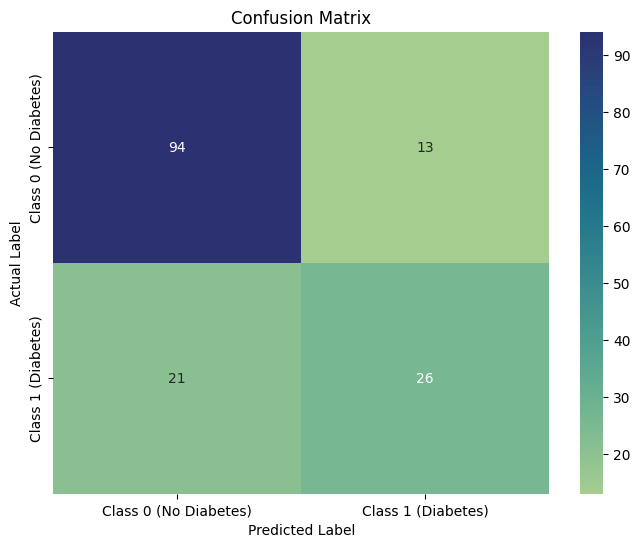

In [111]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest',
            xticklabels=['Class 0 (No Diabetes)', 'Class 1 (Diabetes)'],
            yticklabels=['Class 0 (No Diabetes)', 'Class 1 (Diabetes)'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [108]:
print(accuracy_score(y_test,y_pred)*100)

77.92207792207793


# Breakdown of the Provided Confusion Matrix:

**Key Metrics:**
- True Positives (TP): 94
- True Negatives (TN): 26
- False Positives (FP): 21
- False Negatives (FN): 13

**Calculated Performance Metrics: Accuracy: 78%**

**Interpretation:**
- The model correctly predicted the outcome for 78% of the cases.
- The model struggles to accurately diagnose diabetes, as evidenced by the relatively high number of false negatives.





